# Part II - (Prosper Loan Data Presentation)
## by (Innocent Mukoki)


## Investigation Overview


> In this investigation, I wanted to find out the factors that affect the original loan amount. The features in the dataset which helped support my investigation into the original loan amount are income range, loan status, monthly income, income verifiable, months since origination, origination quarter, origination date, is borrower homeowner, term, borrow rate, listing category and monthly loan payment. 

> The insights that were obtained from this investigation is that generally the number of loans issued decrease as the original loan amount increases with some peaks happening in-between. It was also observed that only original loan amount and monthly loan payment have a strong relationship, the rest of the features have a weak relationship. Generally there is an increase in the average original loan amount as the years progress. It was observed that the scatter plot of original loan amount against monthly loan payment was split into 3 sections using the terms and that each section had a linear relationship. The slope of the linear relationship increased as the term became long which means that as the term becomes longer, the borrower pays less money per month. It was observed that the average original loan amount increases as the term becomes longer. The general trend shows that the average original amount increases as the the time progresses for the 12 and 36 month terms whilst it first decreases then increases for the 60 month term.


## Dataset Overview

> There are 113,937 loans in the dataset with 81 variables. Most variables are numeric in nature. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and the feature documentation can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
# Converting the loan origination date column to datetime type
loan_data['LoanOriginationDate'] = pd.to_datetime(loan_data['LoanOriginationDate'])

In [4]:
# Creating a listing category column with the categories being strings
list_category={0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 
 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 
 20:'Wedding Loans'}

categories = []
for i in range(len(loan_data)):
    categories.append(list_category[loan_data['ListingCategory (numeric)'][i]])
    
loan_data['ListingCategory']=categories

In [5]:
# Creating a column with only quarter
quarters = []
for i in range(len(loan_data)):
    quarters.append(loan_data['LoanOriginationQuarter'][i][0:2])
    
loan_data['OriginationQuarter'] = quarters

In [6]:
# Converting loan status, income verifiable, is borrower homeowner and listing category columns to category type
categories = ['LoanStatus', 'IncomeVerifiable', 'IsBorrowerHomeowner', 'ListingCategory']
for category in categories:
    loan_data[category] = loan_data[category].astype('category')

In [7]:
# Extracting the year from the date column
loan_data['Year'] = loan_data['LoanOriginationDate'].dt.year

## Distribution of original loan amount

> Original loan amount is the money that was borrowed by the borrower. Generally the number of loans issued decrease as the original loan amount increases with some peaks happening in-between.

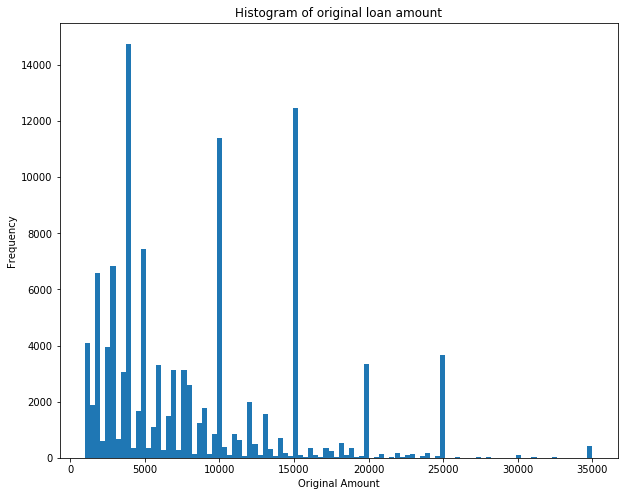

In [8]:
# Plotting a histogram for original loan amount with more bins
plt.figure(figsize=[10, 8])
base_color = sb.color_palette()[0]
loan_data['LoanOriginalAmount'].hist(bins=100, grid=False)

plt.title('Histogram of original loan amount')
plt.xlabel('Original Amount')
plt.ylabel('Frequency')
plt.show();

## Relationship between the features
> Correlation between the features was computed and used to come up with a heatmap. It can be seen that only original loan amount and monthly loan payment have a strong relationship. The rest of the features have a weak relationship.

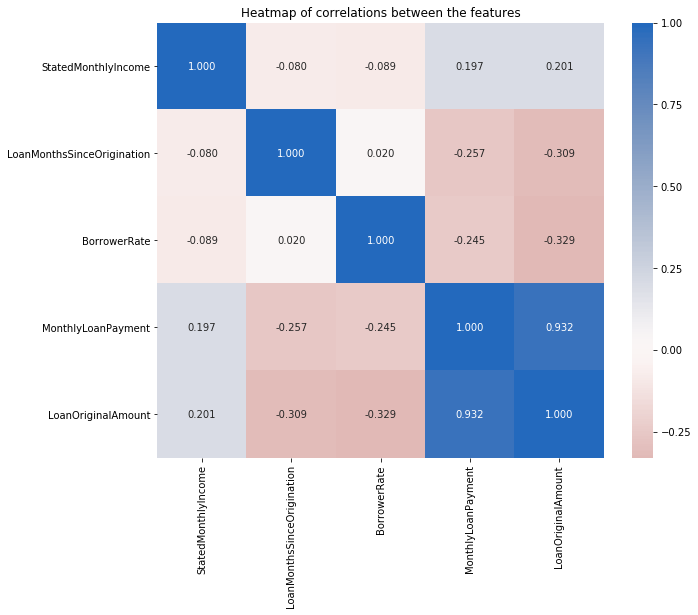

In [9]:
num_vars = ['StatedMonthlyIncome', 'LoanMonthsSinceOrigination', 'BorrowerRate', 'MonthlyLoanPayment', 
           'LoanOriginalAmount']

# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(loan_data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap of correlations between the features')
plt.show()

## General trend of average original loan amount
> The original loan amounts were averaged by year and a plot to show the trend was created. Generally there is an increase in the average original loan amount as the years progress.

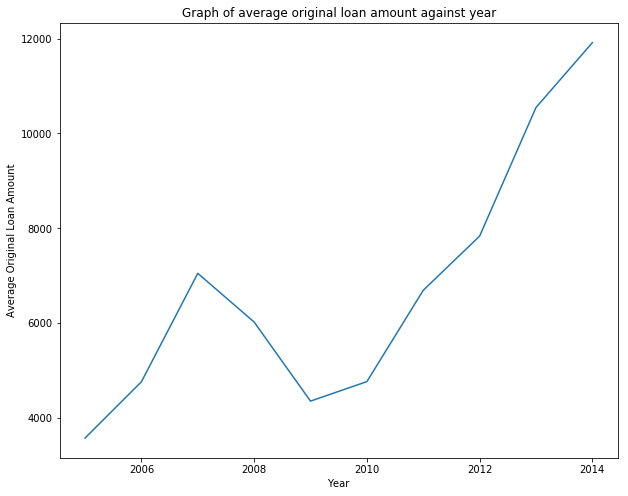

In [10]:
plt.figure(figsize = [10, 8])
loan_data.groupby('Year').mean()['LoanOriginalAmount'].plot()
plt.title('Graph of average original loan amount against year')
plt.xlabel('Year')
plt.ylabel('Average Original Loan Amount')
plt.show()

## Relationship between original loan amount, monthly loan payment and term
> Scatter plot of original loan amount against monthly loan payment was plotted and different colors were used to differentiate the terms. It was observed that the scatter plot was split into 3 sections using the terms and that each section had a linear relationship between original loan amount and monthly loan payment.

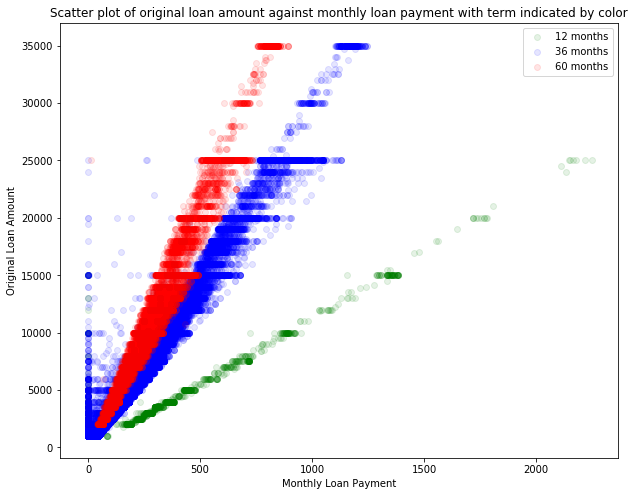

In [11]:
term_col = [[12, 'g'], [36, 'b'], [60, 'r']]
plt.figure(figsize = [10, 8])
for term, col in term_col:
    df = loan_data[loan_data['Term']==term]
    plt.scatter(df['MonthlyLoanPayment'], df['LoanOriginalAmount'], alpha = 1/10, color=col)
plt.title('Scatter plot of original loan amount against monthly loan payment with term indicated by color')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Original Loan Amount')
plt.legend(['12 months', '36 months', '60 months'])
plt.show()

## General trend of average original loan amount separated by term
> A plot of average original loan amount against year was plotted and different colors were used to separate the terms. It can be seen that the average original loan amount increases as the term becomes longer. The general trend shows that the average original amount increases as the the time progresses for the 12 and 36 month terms whilst it first decreases then increases for the 60 month term.

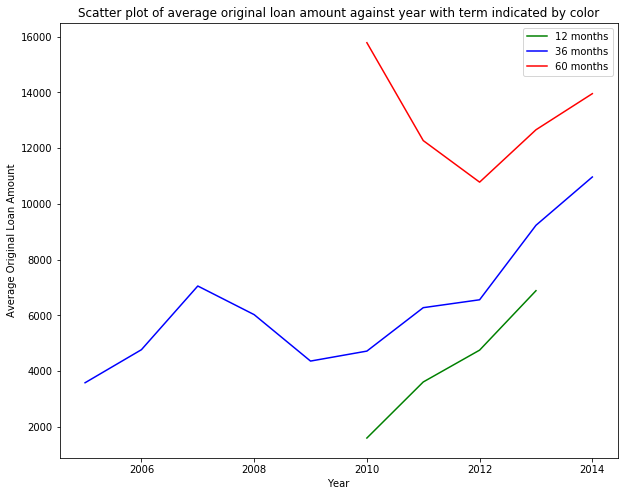

In [12]:
term_col = [[12, 'g'], [36, 'b'], [60, 'r']]
plt.figure(figsize = [10, 8])
for term, col in (term_col):
    plt.plot(loan_data.groupby(['Term','Year']).mean()['LoanOriginalAmount'][term], color=col)
plt.title('Scatter plot of average original loan amount against year with term indicated by color')
plt.xlabel('Year')
plt.ylabel('Average Original Loan Amount')
plt.legend(['12 months', '36 months', '60 months'])
plt.show() 

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part2_Loans_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part2_Loans_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 510390 bytes to Part2_Loans_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part2_Loans_Slide_Deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-b

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
